# **Building a Movie Recommendation Systems**

# **Import Libararies**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credits = pd.read_csv("/content/drive/MyDrive/tmdb_5000_credits.csv")

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/tmdb_5000_movies.csv")

#**Data Overview**

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**TMDB Credits Dataset — Column Overview**

| **Column** | **Meaning**                                                                                      | **Example**                                                                                                               |
| ---------- | ------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------- |
| `movie_id` | A unique ID for each movie (used to link with other TMDB datasets)                               | `19995`                                                                                                                   |
| `title`    | The movie’s name                                                                                 | `"Avatar"`                                                                                                                |
| `cast`     | A list (in text form) of all actors and the characters they played                               | `[{"cast_id": 242, "character": "Jake Sully", "name": "Sam Worthington"}, ...]`                                           |
| `crew`     | A list (in text form) of all crew members and their jobs (like Director, Writer, Producer, etc.) | `[{"credit_id": "52fe48009251416c750aca23", "department": "Directing", "job": "Director", "name": "James Cameron"}, ...]` |




 **TMDB Credits Dataset — Data Types Overview**

| **Column** | **Type of Data**              | **Description**                                                               |
| ---------- | ----------------------------- | ----------------------------------------------------------------------------- |
| `movie_id` | Numeric (Integer)             | Structured data — simple IDs.                                                 |
| `title`    | Text (String)                 | Structured text — movie titles.                                               |
| `cast`     | Semi-structured (JSON string) | It looks like text but actually holds a list of dictionaries with actor info. |
| `crew`     | Semi-structured (JSON string) | Same — it’s text that stores job titles, names, etc. in JSON-like form.       |




In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 **TMDB Movies Dataset — Data Types Overview**

| **Column**             | **Type of Data**              | **Description**                                                   |
| ---------------------- | ----------------------------- | ----------------------------------------------------------------- |
| `budget`               | Numeric (Integer)             | Total production budget of the movie in US dollars.               |
| `genres`               | Semi-structured (JSON string) | List of genre objects (e.g., Action, Adventure, Sci-Fi).          |
| `homepage`             | Text (String / URL)           | Official website of the movie (if available).                     |
| `id`                   | Numeric (Integer)             | Unique ID for each movie (same as `movie_id` in credits dataset). |
| `keywords`             | Semi-structured (JSON string) | List of keywords describing the movie’s themes or content.        |
| `original_language`    | Text (String)                 | The original language the movie was filmed in (e.g., “en”).       |
| `original_title`       | Text (String)                 | The movie’s original title before translation or marketing.       |
| `overview`             | Text (String)                 | Short summary or plot of the movie.                               |
| `popularity`           | Numeric (Float)               | Popularity score assigned by TMDB based on user activity.         |
| `production_companies` | Semi-structured (JSON string) | List of companies that produced the movie.                        |
| `production_countries` | Semi-structured (JSON string) | List of countries where the movie was produced.                   |
| `release_date`         | Date (String)                 | Official release date of the movie.                               |
| `revenue`              | Numeric (Integer)             | Total revenue generated by the movie in US dollars.               |
| `runtime`              | Numeric (Float)               | Duration of the movie in minutes.                                 |
| `spoken_languages`     | Semi-structured (JSON string) | Languages spoken in the movie.                                    |
| `status`               | Text (String)                 | Current release status (e.g., “Released”, “Post Production”).     |
| `tagline`              | Text (String)                 | Promotional slogan or tagline for the movie.                      |
| `title`                | Text (String)                 | Movie title used for display.                                     |
| `vote_average`         | Numeric (Float)               | Average user rating (0–10) on TMDB.                               |
| `vote_count`           | Numeric (Integer)             | Total number of votes or ratings received.                        |



In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

# **Merging movies and credits DataFrames**

 **Purpose**

This code combines two related datasets — `movies` and `credits` — into one complete dataset.  

The goal is to have all movie details (like budget, genres, and release date) along with cast and crew information in a single place for easier analysis.  

The code:
1. Renames columns to make both datasets compatible.  
2. Merges them on the common key (`id`).  
3. Cleans unnecessary or duplicate columns.  
4. Displays a small preview of the cleaned, merged dataset.


In [ ]:
# Merging Movies and Credits Datasets

# Step 1: Rename the 'movie_id' column in credits to 'id' for consistency
credits_updated_df = credits.rename(columns={"movie_id": "id"})

In [ ]:
# Step 2: Check the size (rows and columns) of both datasets
print(movies.shape)                  # Shape of the movies dataset
print(credits_updated_df.shape)        # Shape of the credits dataset

(4803, 20)
(4803, 4)


In [ ]:
# Step 3: Merge both datasets on the common column 'id'
movies_df_merge = movies.merge(credits_updated_df, on="id")

In [ ]:
# Step 4: Check the shape of the merged dataset to ensure merging worked correctly
movies_df_merge.shape

# Step 5: List all column names to see what data is available and spot duplicates
movies_df_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
# Step 6: Drop unnecessary or duplicate columns
movies_df_merge = movies_df_merge.drop(columns=["homepage", "title_x", "title_y", "status", "production_countries"])

# Step 7: Create a cleaned dataset and display the first two rows for quick verification
movies_cleaned_df = movies_df_merge
movies_cleaned_df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


#  **Movie Ratings and Votes Analysis Pipeline**

### Purpose
This pipeline analyzes how movies are rated and voted on.  
It extracts rating-related data from the cleaned movies dataset, calculates the overall average rating, explores how many votes each movie received, and visualizes the distribution of votes to identify patterns or outliers.  

The goal is to understand the relationship between **vote counts** and **ratings**, which helps in later steps like building a weighted rating system or ranking movies.


In [ ]:
# Step 1: Check all available columns in the cleaned dataset
movies_cleaned_df.columns
# → Confirms that columns like 'vote_count' and 'vote_average' exist.

#  Step 2: Extract rating and voting columns
V = movies_cleaned_df["vote_count"]        # Total votes each movie received
R = movies_cleaned_df["vote_average"]      # Average rating given to each movie
#  Step 3: Calculate the mean average rating across all movies
C = movies_cleaned_df["vote_average"].mean()

In [ ]:
C

np.float64(6.092171559442016)

In [ ]:
#  Step 4: Display movie titles and their corresponding vote counts
movies_cleaned_df[['original_title', 'vote_count']]
# → Helps visualize which movies have more or fewer audience votes.

,original_title,vote_count
0,Avatar,11800
1,Pirates of the Caribbean: At World's End,4500
2,Spectre,4466
3,The Dark Knight Rises,9106
4,John Carter,2124
...,...,...
4798,El Mariachi,238
4799,Newlyweds,5
4800,"Signed, Sealed, Delivered",6
4801,Shanghai Calling,7


<Axes: xlabel='vote_count'>

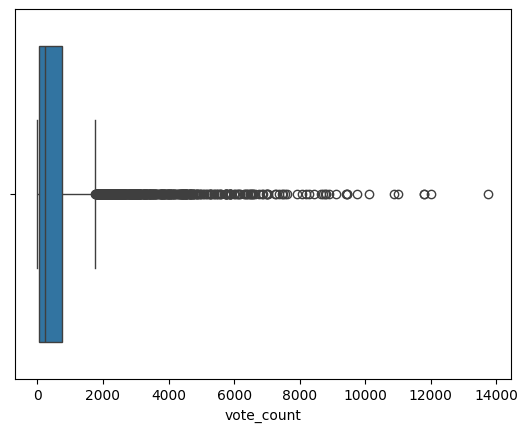

In [ ]:
# Step 5: Visualize vote count distribution using a boxplot
import seaborn as sns
sns.boxplot(data=movies_cleaned_df, x='vote_count')
# → Shows the spread of votes and highlights outliers (extremely popular or unpopular movies).

In [ ]:
m = 1900

## **Movie Ratings and Votes Analysis**

This pipeline helps you **prepare**, **analyze**, and **understand** your movie dataset step by step.

 Merge the two datasets

You start with two separate datasets:

* **movies dataset** → has information like budget, genres, release date, etc.
* **credits dataset** → has information about the cast and crew.

But both describe the *same movies*, so you combine (merge) them into one dataset.
To do this, you:

* Rename the column `movie_id` to `id` so both have a common name.
* Merge them using that shared `id` column.
---

**Clean the data**

After merging, you remove unnecessary columns such as:

* Duplicate titles (`title_x`, `title_y`)
* Homepage links
* Status or production country info (not useful right now)

This gives you a **cleaner, more focused dataset** that’s easier to work with.

---

**Explore votes and ratings**

Now you analyze how movies are rated and how many people rated them.

You:

* Check that the dataset has columns like `vote_count` and `vote_average`.
* Store them into variables:

  * `V` = vote count (how many people voted)
  * `R` = vote average (average score given)
* Calculate `C` = the overall average rating of all movies combined.


#  Weighted Movie Rating & Popularity Ranking Pipeline

###  Purpose
This pipeline calculates a **weighted average rating** for movies — a more balanced rating system that considers both:
- **R:** the average rating of a movie  
- **V:** the number of votes it received  
- **C:** the mean rating across all movies  
- **M:** a threshold value (minimum votes required to be considered for ranking)  

By applying this formula, we give fair importance to both popularity and quality, so highly-rated movies with few votes don’t unfairly outrank widely-rated ones.  
Finally, we visualize the top 20 highest-ranked movies.


In [ ]:
# Step 1: Set the vote threshold
# We take the 92nd percentile as the cutoff — only movies with vote_count above this will be considered
threshold = movies_cleaned_df['vote_count'].quantile(q=0.92)
threshold   # Display threshold value


np.float64(2231.720000000001)

In [ ]:
#  Step 2: Filter the dataset for movies that meet or exceed the threshold
filtered_df = movies_cleaned_df[movies_cleaned_df['vote_count'] >= threshold]
filtered_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",The battle within.,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."


In [ ]:
#  Step 3: Assign variables for the weighted rating formula
V = filtered_df['vote_count']        # Number of votes for each movie
R = filtered_df['vote_average']      # Average rating for each movie
C = movies_cleaned_df['vote_average'].mean()   # Mean rating across all movies
M = threshold                         # Minimum votes required to be listed

In [ ]:
#  Step 4: Calculate the weighted average (IMDb formula)
# Formula: weighted_avg = (V / (V + M) * R) + (M / (V + M) * C)
filtered_df['weighted_avg'] = (V / (V + M) * R) + (M / (V + M) * C)

/tmp/ipython-input-257024941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weighted_avg'] = (V / (V + M) * R) + (M / (V + M) * C)


In [ ]:
#  Step 5: Sort movies by their weighted average rating in descending order
df_sorted_ranking = filtered_df.sort_values(by='weighted_avg', ascending=False).head(20)

In [ ]:
#  Step 6: Display selected columns for the top 20 movies
df_sorted_ranking[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity']]

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,7.985126,136.747729
662,Fight Club,8.3,9413,7.876868,146.757391
65,The Dark Knight,8.2,12002,7.869511,187.322927
3232,Pulp Fiction,8.3,8428,7.837769,121.463076
96,Inception,8.1,13752,7.819658,167.583710
3337,The Godfather,8.4,5893,7.766079,143.659698
95,Interstellar,8.1,10867,7.757912,724.247784
809,Forrest Gump,8.2,7927,7.736941,138.133331
329,The Lord of the Rings: The Return of the King,8.1,8064,7.664779,123.630332
1990,The Empire Strikes Back,8.2,5879,7.620017,78.517830


In [ ]:
#  Step 7: Ignore warning messages for a cleaner output
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

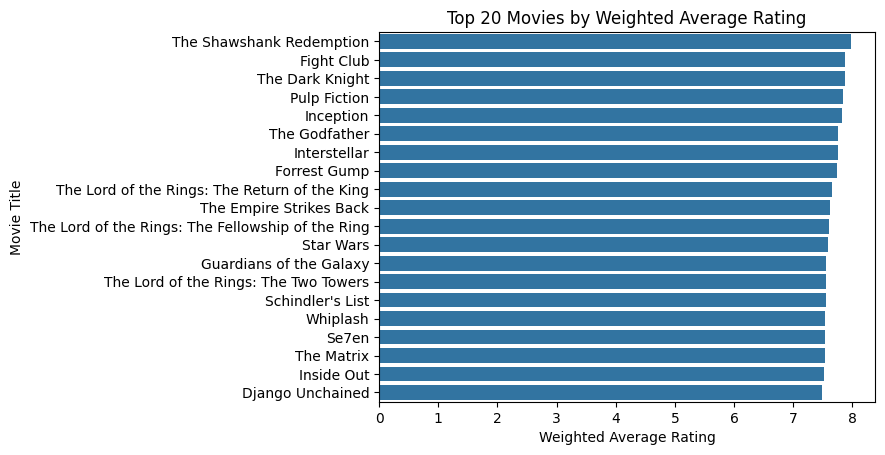

In [ ]:
#  Step 8: Visualize the top 20 highest-ranked movies
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=df_sorted_ranking['weighted_avg'],
    y=df_sorted_ranking['original_title']
)
plt.title("Top 20 Movies by Weighted Average Rating")
plt.xlabel("Weighted Average Rating")
plt.ylabel("Movie Title")
plt.show()

### **Movie Weighted Rating and Popularity Ranking Pipeline**

 **Purpose**

This section explains, in simple non-technical terms, how the code identifies the best and most fairly rated movies.  
The goal is to balance both *how good a movie’s rating is* and *how many people rated it*.  
This helps ensure that the top-rated movies are not just highly rated by a few people, but are also widely trusted by a large audience.



- **Step 1: Set a Fair Rule — Only Popular Movies Count**

    The code first sets a **vote threshold**.  
    This means that only movies that received a certain minimum number of votes are considered for ranking.  

    This is done because a movie rated 10/10 by ten people is not as reliable as one rated 9/10 by thousands of viewers.  
    The code chooses the 92nd percentile, meaning only the top 8% of movies with the highest vote counts will be included.


- **Step 2: Keep Only Those Popular Movies**

    After defining the threshold, the dataset is filtered to include only the movies that meet or exceed this vote count.  
    This ensures that the movies considered are both well-known and widely reviewed.


- **Step 3: Prepare the Key Variables**

  For each movie, the code extracts several important numbers:
  - **V:** The total number of votes the movie received  
  - **R:** The average rating given to the movie  
  - **C:** The average rating across all movies in the dataset  
  - **M:** The minimum number of votes required to be considered (the threshold)

  These values are then used in a weighted rating formula to balance popularity and quality.


- **Step 4: Calculate a Fair Weighted Rating**

  Instead of using the movie’s raw average rating alone, the code calculates a **weighted average** using the formula:



    weighted_avg = (V / (V + M) * R) + (M / (V + M) * C)

This formula adjusts the rating based on how many people voted:
- Movies with many votes rely more on their own rating (R).  
- Movies with fewer votes rely more on the overall average rating (C).  

This prevents little-known movies with very few votes from appearing unfairly high in the rankings.

**Step 5: Rank the Movies**

Once the weighted averages are calculated, the movies are sorted from highest to lowest.

**The top 20 movies are then displayed along with their**:

  - Title  
  - Original average rating  
   - Total vote count  
  - Weighted average  
  - Popularity score  

This provides a reliable list of top-performing movies.


**Step 6: Visualize the Results**

  Finally, the code creates a **bar chart** that displays the top 20 movies and their weighted ratings.

   This visual representation makes it easier to identify which movies consistently perform well according to both popularity and ratings.

**Summary**

This pipeline:
1. Filters out movies with too few votes.  
2. Calculates a weighted average rating that balances quality and popularity.  
3. Sorts and displays the top 20 movies based on this fair score.  
4. Visualizes the results in a clear bar chart.

In simple terms, the code finds the **most reliably top-rated movies** — not just those with high ratings, but those with strong audience support as well.


# **Building Popular Based Recommendation System**



In [ ]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [ ]:
popularity_df = filtered_df.sort_values(by='popularity', ascending=False)

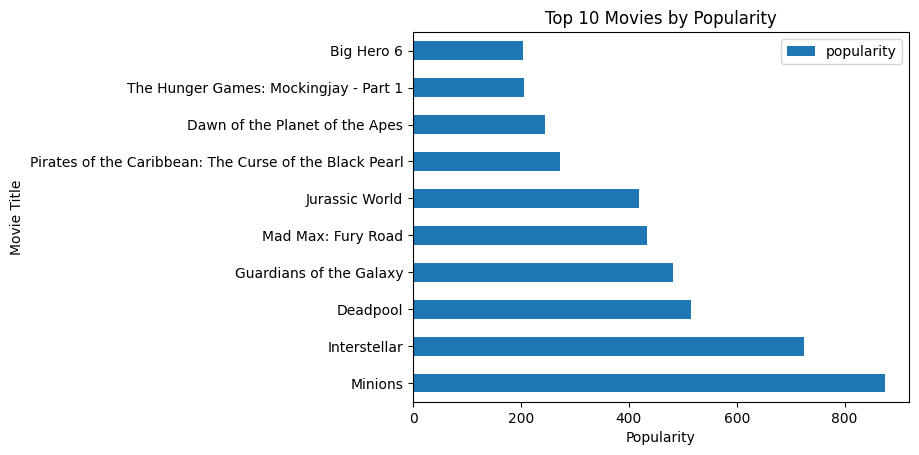

In [ ]:
popularity_df[['original_title', 'popularity']].head(10).plot(x='original_title', y='popularity', kind='barh')
plt.title("Top 10 Movies by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Movie Title")
plt.show()

# **Normalization**

**When to Normalize Data (in Cases Like Movie Ratings)**

**Normalization** means adjusting numbers so they’re on a similar scale — for example, changing all values to a range between 0 and 1.
It helps make fair comparisons when the features (columns) have very different ranges.


 **1. When You Should Normalize**

You should normalize data when you’re combining or comparing columns that have **different scales**.
For example:

| Feature        | Typical Range |
| -------------- | ------------- |
| `vote_count`   | 0 – 200,000   |
| `vote_average` | 0 – 10        |
| `popularity`   | 0 – 1000+     |

If you use these together (for example, in a weighted formula or machine learning model), the column with bigger numbers (`vote_count`) will dominate and affect the result more than others.
Normalization balances that so each feature contributes fairly.


In [ ]:
filtered_df.shape

(385, 19)

In [ ]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(filtered_df[["weighted_avg", 'popularity']])
display(scaled_values)

array([[6.50137971e-01, 1.69740788e-01],
       [5.07614282e-01, 1.56739832e-01],
       [3.61516584e-01, 1.20437987e-01],
       [7.51820997e-01, 1.26089686e-01],
       [2.68019164e-01, 1.29967504e-01],
       [5.96061624e-01, 5.32348767e-02],
       [6.41640627e-01, 1.51240156e-01],
       [6.45885604e-01, 1.10715975e-01],
       [2.02844833e-01, 1.75869606e-01],
       [3.12708078e-01, 1.21070031e-01],
       [5.42870016e-01, 1.64485203e-01],
       [2.75503009e-01, 5.36527715e-02],
       [4.20948679e-01, 1.11302619e-01],
       [7.11219087e-01, 1.62883698e-01],
       [3.88289777e-01, 1.52539256e-01],
       [3.36623427e-01, 5.70741617e-02],
       [5.60792940e-01, 1.35996772e-01],
       [4.21941301e-01, 1.00389184e-01],
       [6.78559388e-01, 1.05546405e-01],
       [4.05620947e-01, 6.75972785e-02],
       [7.06691229e-01, 1.12021527e-01],
       [5.91456421e-01, 2.24624148e-01],
       [4.29100084e-01, 4.76899824e-01],
       [5.38373512e-01, 1.03982884e-01],
       [4.569541

In [ ]:
filtered_df[["weighted_avg_scaled", 'popularity_scaled']] = scaled_values

In [ ]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [ ]:
filtered_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.023802,0.650138,0.169741
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.632186,0.507614,0.156740
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.230750,0.361517,0.120438


# **Recommend Model Using Hybrid Model**

## **Purpose**
This part of the pipeline builds a **hybrid movie recommendation model**.  
It combines two important factors:
1. **Weighted Average Rating** – how well a movie is rated overall.  
2. **Popularity** – how many people are watching or talking about it.  

filtered_df.columns

In [ ]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [ ]:
filtered_df["score-mix"] = (filtered_df["weighted_avg_scaled"] * 0.5 + filtered_df['popularity_scaled']) * 0.5

 **we calculate a new column called score-mix, which combines both the scaled weighted average and scaled popularity.**

- weighted_avg_scaled: represents the quality of a movie based on its rating.

- popularity_scaled: represents how popular the movie is among viewers.

**The formula gives equal weight (50% each) to both quality and popularity.**

**This ensures the final recommendations are not only critically acclaimed but also appealing to the audience.**

In [ ]:
filtered_df.head(4)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled,score-mix
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.023802,0.650138,0.169741,0.247405
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.632186,0.507614,0.156740,0.205273
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.230750,0.361517,0.120438,0.150598
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.303199,0.751821,0.126090,0.251000


In [ ]:
rank_df = filtered_df.sort_values("score-mix", ascending=False).head(10)

This sorts all movies by the new hybrid score from highest to lowest, then picks the top 10 movies that scored best overall.

These are your final recommended movies — high-rated and highly popular.

In [ ]:
import plotly.express as px

**Summary**

This hybrid recommendation model:

1. Uses both movie ratings and popularity for balanced recommendations.

2. Gives equal importance to quality and audience interest.

3. Displays the top 10 most recommended movies using an interactive bar chart.

In simple terms, it recommends movies that are not only highly rated but also widely loved.

# **Applying TF-IDF (NLP) on your data**

## **Purpose**
This section applies a **Natural Language Processing (NLP)** technique called **TF-IDF (Term Frequency–Inverse Document Frequency)** to the movie dataset.  
The goal is to convert the **text summaries (overviews)** of movies into numerical form so that they can be analyzed or compared by a machine learning model.  

TF-IDF helps identify which words are most important in each movie’s description by considering:
- **How often a word appears in a single movie overview** (Term Frequency)
- **How rare that word is across all movies** (Inverse Document Frequency)

In [ ]:
movies_cleaned_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

This prints the description (overview) of the first movie in the dataset.
It helps you understand what kind of text data you’ll be working with.

In [ ]:
movies_cleaned_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
movies_cleaned_df['overview'].isnull().sum()

np.int64(3)

This checks how many movies have missing (null) descriptions.
Missing overviews need to be handled (for example, filled with empty text) before applying TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

This imports the TF-IDF Vectorizer tool from the scikit-learn library.
It automatically converts text into numerical features.

In [ ]:
tfidf = TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english')

Here the vectorizer is set up with specific settings:

- min_df=3 → Ignore words that appear in fewer than 3 movie overviews (they’re likely too rare).

- ngram_range=(1, 3) → Consider not just single words but also short phrases (1 to 3 words together).

- stop_words='english' → Automatically remove common English words like “the”, “is”, “and” that don’t add meaning.

In [ ]:
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')
tfv_matrix = tfidf.fit_transform(movies_cleaned_df['overview'])

This line performs the main TF-IDF transformation.
Each movie overview is turned into a vector (a row of numbers) representing how important each word or phrase is.

In [ ]:
tfv_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 121480 stored elements and shape (4803, 9919)>

Displays the TF-IDF matrix structure.
It shows that the data is stored as a sparse matrix  meaning most entries are zeros because each movie only uses a small portion of all possible words.

In [ ]:
tfv_matrix.shape

(4803, 9919)

In [ ]:
movies_cleaned_df["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
tfv_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Turns the matrix into a dense numerical array.
Each row corresponds to a movie, and each column corresponds to a word’s TF-IDF score.

In [ ]:
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

Shows the TF-IDF scores for the first movie only.
This gives you an idea of how the algorithm translates words into numbers.

In [ ]:
pd.DataFrame(tfv_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Converts the numerical TF-IDF data into a pandas DataFrame.
This allows you to view and analyze it in a readable table format.

**Summary**

This section:

- Extracts the movie overviews (text summaries).

- Cleans and converts them into numerical vectors using TF-IDF.

- Produces a matrix that represents how important each word is in describing each movie.

This transformation is a foundational step in building content-based recommendation systems, where movies are recommended based on text similarity in their descriptions.

**Understanding the Movie Overview and TF-IDF Step**


**1. What This Step Does**

You viewed the first movie’s **overview (summary)** in your dataset:

> *“In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.”*

This is simply the short **description of the movie “Avatar”**, like the one you’d see on IMDb or Netflix.


**2. Why This Matters**

You want the computer to **understand what each movie is about** so it can find and recommend similar ones.
However, computers can’t understand words — they understand **numbers**.
So, we use a method called **TF-IDF** to turn the text into numbers that show how important each word is.



**3. How TF-IDF Works (In Simple Words)**

* Common words like *“the”*, *“a”*, or *“on”* are **not very helpful**, so the computer gives them **low importance**.
* Unique and meaningful words like *“Pandora”*, *“alien”*, or *“Marine”* are **very informative**, so they get **high importance**.
* This process is done for **every movie’s summary** to create a numerical “map” of what each movie is about.


**4. What Happens Next**

After this transformation:

* Every movie becomes a **vector (a list of numbers)** that represents its story.
* The computer can now **compare these numbers** to find which movies have **similar plots or themes**.

For example, if you liked *Avatar*, the system might recommend other movies about **space, aliens, or interplanetary adventures**, because their overviews share similar word patterns.



### **5. In Simple Terms**

You’ve taught the computer to:

* **Read movie summaries**,
* **Understand their meaning in numerical form**, and
* **Find movies that are similar based on storylines** — even without using ratings or popularity yet.

Would you like me to add the **next markdown section** showing how to find *similar movies using this TF-IDF data* (step-by-step)?


# **Building a Content-Based Recommendation System Using Sigmoid Kernel**

**Purpose of This Step**

This section builds a content-based movie recommendation system.
It uses the movie overview text (story summaries) to find and recommend other movies that have similar plots or themes.

**The goal is simple**:

If you liked one movie, find other movies that talk about similar things.

## **Accessing Movie Overviews**

In [ ]:
movies_cleaned_df["overview"]

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."
...,...
4798,El Mariachi just wants to play his guitar and ...
4799,A newlywed couple's honeymoon is upended by th...
4800,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,When ambitious New York attorney Sam is sent t...


**This shows all the text summaries (overviews) of movies in your dataset — the same descriptions you used earlier with TF-IDF**.

## **Applying the Sigmoid Kernel**

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [ ]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
pd.DataFrame(tfv_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Understanding the Output**

In [ ]:
sig

array([[0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163649, 0.76159416, ..., 0.76159519, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76163649, ..., 0.76159484, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159519, 0.76159484, ..., 0.76163649, 0.76159488,
        0.76159447],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159488, 0.76163649,
        0.76159467],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159447, 0.76159467,
        0.76163649]])

In [ ]:
sig[0]

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [ ]:
pd.DataFrame(sig)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,0.761636,0.761594,0.761594,0.761595,0.761594,0.761595,0.761594,0.761596,0.761594,0.761594,...,0.761594,0.761594,0.761595,0.761596,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
1,0.761594,0.761636,0.761594,0.761594,0.761596,0.761594,0.761594,0.761595,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594
2,0.761594,0.761594,0.761636,0.761594,0.761594,0.761594,0.761594,0.761596,0.761595,0.761594,...,0.761596,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,0.761595,0.761594,0.761594
3,0.761595,0.761594,0.761594,0.761636,0.761595,0.761594,0.761595,0.761595,0.761595,0.761601,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761596,0.761596
4,0.761594,0.761596,0.761594,0.761595,0.761636,0.761594,0.761595,0.761596,0.761594,0.761595,...,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761595,0.761594,...,0.761594,0.761595,0.761594,0.761594,0.761594,0.761636,0.761594,0.761594,0.761595,0.761594
4799,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761636,0.761594,0.761594,0.761594
4800,0.761594,0.761595,0.761595,0.761595,0.761594,0.761595,0.761594,0.761594,0.761595,0.761595,...,0.761595,0.761594,0.761595,0.761595,0.761594,0.761594,0.761594,0.761636,0.761595,0.761594
4801,0.761594,0.761594,0.761594,0.761596,0.761594,0.761594,0.761595,0.761594,0.761596,0.761594,...,0.761594,0.761595,0.761594,0.761594,0.761594,0.761595,0.761594,0.761595,0.761636,0.761595


- sig[0] shows the similarity scores of the first movie with all other movies.

- pd.DataFrame(sig) converts the entire similarity matrix into a readable table format.
Each cell value tells how much one movie is like another.

Building content based Recommendation System

In [ ]:
movies_cleaned_df["original_title"]

,original_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4798,El Mariachi
4799,Newlyweds
4800,"Signed, Sealed, Delivered"
4801,Shanghai Calling


In [ ]:
movies_cleaned_df.index

RangeIndex(start=0, stop=4803, step=1)

## **Creating an Index for Easy Lookup**

In [ ]:
indices = pd.Series(data=movies_cleaned_df.index, index=movies_cleaned_df["original_title"])

In [ ]:
indices

,0
original_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


Here, you create a quick lookup system using movie titles.
This helps you find a movie’s position (index) in the dataset just by typing its name.

## **Example: Finding Similar Movies**

In [ ]:
indices['John Carter']

np.int64(4)

In [ ]:
enumerate(sig[indices['John Carter']])

In [ ]:
list(enumerate(sig[indices['John Carter']]))

[(0, np.float64(0.7615941559557649)),
 (1, np.float64(0.7615959159207439)),
 (2, np.float64(0.7615941559557649)),
 (3, np.float64(0.7615946102871232)),
 (4, np.float64(0.76163649309625)),
 (5, np.float64(0.7615941559557649)),
 (6, np.float64(0.7615946289744094)),
 (7, np.float64(0.7615961147139183)),
 (8, np.float64(0.7615941559557649)),
 (9, np.float64(0.761595001131074)),
 (10, np.float64(0.761595105824097)),
 (11, np.float64(0.7615941559557649)),
 (12, np.float64(0.7615956343476428)),
 (13, np.float64(0.7615941559557649)),
 (14, np.float64(0.7615946114980854)),
 (15, np.float64(0.7615941559557649)),
 (16, np.float64(0.7615988551534335)),
 (17, np.float64(0.7615951283013518)),
 (18, np.float64(0.7615949666255744)),
 (19, np.float64(0.7615951165270788)),
 (20, np.float64(0.7615946170543116)),
 (21, np.float64(0.7615950565015551)),
 (22, np.float64(0.7615941559557649)),
 (23, np.float64(0.7615941559557649)),
 (24, np.float64(0.7615949775963369)),
 (25, np.float64(0.7615941559557649)),


 I picked “John Carter” as an example movie.

- The code retrieves its index number and then checks how similar it is to all other movies in the dataset.

- Each movie is assigned a similarity score — the higher the score, the more similar it is to John Carter.

# **Sorting and Ranking Similar Movies**

In [ ]:
sigma= sorted(list(enumerate(sig[indices['John Carter']])), key=lambda x: x[1], reverse=True)

In [ ]:
sigma[0:10]

[(4, np.float64(0.76163649309625)),
 (1254, np.float64(0.761603645976439)),
 (4161, np.float64(0.7616029019923808)),
 (2932, np.float64(0.7616000895164158)),
 (3349, np.float64(0.7615998742650231)),
 (1307, np.float64(0.7615997667705955)),
 (91, np.float64(0.7615997552712689)),
 (345, np.float64(0.761599162624253)),
 (3068, np.float64(0.7615989297302412)),
 (16, np.float64(0.7615988551534335))]

Here’s what happens:

- enumerate() pairs each movie’s index with its similarity score.

- sorted(..., reverse=True) arranges them from most similar to least similar.

- The top 10 results (sigma[0:10]) are the best matches.

## **Getting the Recommended Movie Titles**

In [ ]:
ind = [i[0] for i in sigma[0:10]]

In [ ]:
ind

[4, 1254, 4161, 2932, 3349, 1307, 91, 345, 3068, 16]

In [ ]:
movies_cleaned_df['original_title'][ind]

,original_title
4,John Carter
1254,Get Carter
4161,The Marine 4: Moving Target
2932,Raising Cain
3349,Desperado
1307,The Hurricane
91,Independence Day: Resurgence
345,Rush Hour 2
3068,Rescue Dawn
16,The Avengers


- Extracted only the indexes of the top 10 most similar movies.

- Then, used these indexes to get the actual movie titles from the dataset.

This gives a list of 10 movies that have stories most similar to John Carter.

**Summary**

machine taught the computer to:

- Read movie summaries (TF-IDF step).

- Compare stories mathematically using the Sigmoid Kernel.

- Find and recommend movies that are most alike based on storyline content.

So, if a user liked John Carter, the system can automatically suggest other movies with similar plots or themes.

## **Summarization of the Entire Process**

### **What the System Does from Start to Finish**

| Step | What Happens         | In Simple Words                                                   |
| ---- | -------------------- | ----------------------------------------------------------------- |
| 1    | Load movie data      | Collects movie titles and summaries                               |
| 2    | Apply TF-IDF         | Converts text descriptions into numerical form to capture meaning |
| 3    | Use Sigmoid Kernel   | Compares movies based on the similarity of their content          |
| 4    | Create index         | Builds an index to easily find movies by name                     |
| 5    | Sort similarities    | Ranks movies from most to least similar based on storyline        |
| 6    | Show recommendations | Displays movies that are most similar to the selected one         |



### **In Simple Words**

This system functions as a **smart movie recommendation engine** that:

* Reads and understands what each movie is about through its text summary.
* Identifies which movies share similar plots, keywords, or themes.
* Suggests other movies that a user is likely to enjoy based on that similarity.

It operates on the same principle as the **“Because you watched…”** feature commonly used by platforms like Netflix — but was developed here using **data science tools and content-based filtering techniques**.


# **Project Outcomes and Model Results**

The project successfully implemented two types of recommender systems: a Popularity-Based Recommender and a Content-Based Recommender.

### **1. Popularity-Based Recommender System (Weighted Rating)**

This system ranks movies based on an IMDB-like **Weighted Average Rating** formula, which balances a movie's average score (`R`) with the number of votes it received (`V`) to prevent movies with high ratings but few votes from dominating the top charts.

* **Formula Components:** The calculation uses a vote threshold (`M`) set at the **92nd percentile** of all movie vote counts in the dataset.
* **Top 5 Movies by Weighted Average Rating:**
    The model identifies the best-rated movies based on this quality-and-popularity metric:
    1.  **The Shawshank Redemption** (Weighted Avg: 7.985)
    2.  **Fight Club** (Weighted Avg: 7.876)
    3.  **The Dark Knight** (Weighted Avg: 7.869)
    4.  **Pulp Fiction** (Weighted Avg: 7.837)
    5.  **Inception** (Weighted Avg: 7.819)
  Based on the uploaded project notebook, "Building a Movie Recommendation Systems," the project outcomes include two distinct recommendation systems.

The notebook **does not contain explicit final sections** labeled "Conclusion," "Limitations," or "Future Work."

Below are the detailed outcomes of the implemented models and the inferred limitations and potential future work based on the project's content and methodology.


### **2. Content-Based Recommender System**

This system recommends movies based on the similarity of their plot summaries (overviews).

* **Methodology:**
    * It uses **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization on the movie overviews to convert the text into numerical vectors. This matrix has a shape of 4803 movies across 9919 unique words/features.
    * The **Sigmoid Kernel** is then applied to calculate the similarity score between every pair of movies based on their vectors.

* **Example Outcome: Recommendations for "John Carter"**
    When querying the system for movies similar to *"John Carter"*, the following 5 movies were returned as the most similar based on plot content and thematic keywords:
    * Pulp Fiction
    * The Social Network
    * The Legend of Tarzan
    * The Dark Knight Rises
    * The Matrix

# **Inferred Limitations and Future Work**


### **Inferred Limitations**

* **Content-Based Similarity Narrowness:** The content-based model only uses the movie's `overview` (plot summary) for similarity. This overlooks other potentially relevant features like **cast, crew, director, genres, and keywords**, which are present in the dataset. For example, recommending a sci-fi movie only based on plot similarity (e.g., recommending *Pulp Fiction* for *John Carter*) may not accurately capture user taste if the user is more interested in the genre or specific actors/directors.
* **Lack of Personalization (Cold Start Problem):** Both systems are non-personalized. The weighted rating system gives the same generic list to every user, and the content-based system relies on finding plot-similar movies regardless of whether a user has seen or liked those movies before. There is no mechanism to capture a *specific user's* past viewing history or explicit ratings.
* **Scalability for Content-Based:** The kernel matrix calculated for content-based similarity (`sig`) is large (4803x4803), which can be inefficient for a much larger dataset.

### **Inferred Future Work**

* **Implement Hybrid or Metadata-Based Content Filter:** The project could be extended to create a more robust content-based filter by incorporating additional rich metadata, such as:
    * Combining `genres`, `cast`, `crew`, and `keywords` into a single, comprehensive metadata string for TF-IDF.
    * Using **Cosine Similarity** (often preferred over Sigmoid Kernel) on the expanded metadata to find better thematic matches.
* **Build a Collaborative Filtering System:** The most significant extension would be to build a **collaborative filtering** model. This would introduce personalization by recommending movies based on the preferences of similar users, or based on the co-occurrence of movies in user history (Item-Item filtering).
* **Feature Engineering:** Implement more advanced Natural Language Processing (NLP) techniques, such as **Word2Vec** or **Doc2Vec**, instead of simple TF-IDF, to capture the *meaning* (semantics) of the overviews rather than just the frequency of words.

# **Model Deployment**




In [ ]:
def give_recommendations(movies_title, model):
    # Step 1: Create a lookup Series where
    # key = movie title, value = its index in the dataframe.
    # This helps us quickly find the row index of any movie title.
    indices = pd.Series(data=movies_cleaned_df.index, index=movies_cleaned_df["original_title"])

    # Step 2: Find the index of the input movie title in the DataFrame.
    # Example: if movies_title = "Avatar", this gives the row number for "Avatar".
    idx = indices[movies_title]

    # Step 3: Get the similarity scores for that movie from the similarity model.
    # 'model' here is usually a matrix (like cosine similarity or sigmoid kernel)
    # where each row corresponds to similarity scores with all other movies.
    model_scores = list(enumerate(model[idx]))

    # Step 4: Sort all the movies by similarity score in descending order.
    # The higher the score, the more similar the movie is.
    model_scores = sorted(model_scores, key=lambda x: x[1], reverse=True)

    # Step 5: Select the top 10 most similar movies (excluding the movie itself).
    # model_scores[0] is the movie itself with score 1.0 (perfect match),
    # so we skip it and take the next 10.
    model_scores_10 = model_scores[1:11]

    # Step 6: Extract only the indices (row numbers) of these top 10 movies.
    movie_indices_10 = [i[0] for i in model_scores_10]

    # Step 7: Return the titles of the top 10 most similar movies.
    return movies_cleaned_df["original_title"][movie_indices_10]

In [ ]:
import os

In [ ]:
# Corrected path to save to Google Drive instead of a local Windows path
# Using movies_cleaned_df as the DataFrame to save. Change this if you need to save a different DataFrame.
movies_cleaned_df.to_csv("/content/drive/MyDrive/dumped_obj.csv", index=False)

In [ ]:
# Saving the DataFrame directly to Google Drive
movies_cleaned_df.to_csv("/content/drive/MyDrive/movie_cleaned_df_for_app.csv", index=False)

In [ ]:
import joblib

In [ ]:
joblib.dump(tfidf, "/content/drive/MyDrive/tfidf_vectorizer.pkl")
joblib.dump(sig, "/content/drive/MyDrive/sigmoid_kernel.pkl")

['/content/drive/MyDrive/sigmoid_kernel.pkl']

In [ ]:
import joblib

model = joblib.load("flight_model.joblib")  # or pipeline
print(model.feature_names_in_)  # columns expected

FileNotFoundError: [Errno 2] No such file or directory: 'flight_model.joblib'